# DS_D36_LU1_V1.0

In this case study, you will be shown how to clean the data before building the Linear Regression model by validating its assumptions and also regularizing it with some regularization techniques from Python.

##### Scenario :

Fargo is a Real Estate company which deals with properties and renting house across cities. It decides to collect numerous data to find out which factor affects the house price such as rainfall, availability of parking and even the distance to hospital and market 

##### Challenge :

Fargo decides to hire a Data scientist to analyse the data and implement the appropriate algorithm after cleaning the data


##### Dataset : 

This dataset contains house price of of cities that fall under the categories A,B and C based on the availability of parking, rainfall, its builtup area etc

- <b>Dist_Taxi:</b> distance to nearest taxi stand from the property
- <b>Dist_Market:</b> distance to nearest grocery market from the property
- <b>Dist_Hospital:</b> distance to nearest hospital from the property
- <b>Carpet:</b> carpet area of the property in square feet
- <b>Builtup:</b> built-up area of the property in square feet
- <b>Parking:</b> type of car parking available with the property
- <b>City_Category:</b> categorization of the city based on the size
- <b>Rainfall:</b> annual rainfall in the area where property is located
- <b>House_Price</b> price at which the property was sold

## Problem Solution

<div style="background-color:##EDF9FF">
 <ul><li><h3>Import the required library</h3></li></ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="background-color:##EDF9FF">
 <ul><li><h3>Read the dataset from csv file</h3></li></ul>
</div>

In [2]:
df = pd.read_csv("Regression-Analysis-Data.csv")

In [3]:
df.head()  ## Looking for top 5 rows

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [4]:
df.tail() ### helps us to view bottom 5 rows

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000


In [5]:
df.shape ## we can exmanine the dimension of the data

(932, 10)

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Since we dont need observation as this is a nominal data, hence we should drop the observation from further analysis</span>
</div>

In [6]:
df = df.drop('Observation', axis=1) 

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Doing basic analysis on data - 7 point statistics and identiy if any null values present in the data or not</span>
</div>

In [7]:
df.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,919.000000,919.000000,931.000000,924.000000,917.000000,932.000000,9.320000e+02
mean,8229.727965,11018.752992,13072.092374,1511.862554,1794.924755,785.579399,6.084695e+06
std,2561.985008,2543.920590,2586.456161,790.969660,468.159457,265.546853,5.025364e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,6476.000000,9354.500000,11301.500000,1318.000000,1583.000000,600.000000,4.658000e+06
50%,8230.000000,11161.000000,13163.000000,1480.500000,1774.000000,780.000000,5.866000e+06
75%,9937.000000,12670.500000,14817.000000,1655.000000,1982.000000,970.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [8]:
df.isnull().sum()  # code will help us in counting for any missing values in the data

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

<div style="background-color:##EDF9FF">
 <ul><li><h3>Distribution of target variable</h3></li></ul>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_Price', ylabel='Density'>

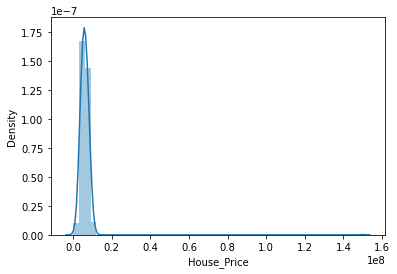

In [9]:
sns.distplot(df['House_Price'])  ## The chart explians that the distribution is skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House_Price'>

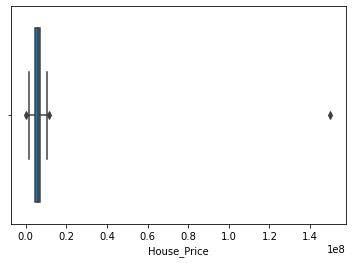

In [10]:
sns.boxplot(df['House_Price'])

<div style="background-color:##EDF9FF">
 <ul><li><h3>Finding outlier</h3></li></ul>
</div>

In [11]:
hp = sorted(df['House_Price'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = df['House_Price'] > lower_bound
above = df['House_Price'] < upper_bound
df = df[below & above]

In [12]:
df
df.shape

(929, 9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House_Price'>

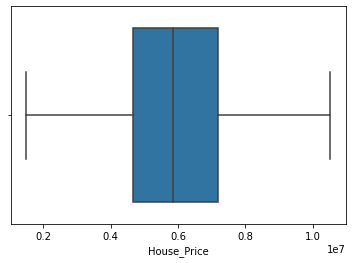

In [13]:
sns.boxplot(df['House_Price']) ### after removing the outlier, we are able to make the distrbution fairly normal

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_Price', ylabel='Density'>

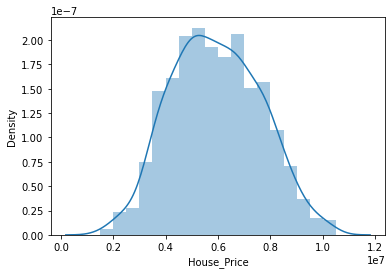

In [14]:
sns.distplot(df['House_Price'])

<div style="background-color:##EDF9FF">
 <ul><li><h3>Checking for categories</h3></li></ul>
</div>

In [15]:
df.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [16]:
df.City_Category.value_counts() ## Distribution of observation for city category

CAT B    364
CAT A    327
CAT C    238
Name: City_Category, dtype: int64

In [17]:
df.Parking.value_counts() ## Distribution of observation for parking

Open            371
Not Provided    227
Covered         187
No Parking      144
Name: Parking, dtype: int64

<div style="background-color:##EDF9FF">
 <ul><li><h3>Removing missing values</h3></li></ul>
</div>

In [18]:
df_new = df.dropna() ## Code will remove any instance which contans any null values

In [19]:
df_new.shape

(896, 9)

<div style="background-color:##EDF9FF">
 <ul><li><h3>Checking for any other outlier in the data</h3></li></ul>
</div>

In [20]:
df_new.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [21]:
df_new.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Data is centered,as well has some outlier. Its not a good idea to remove the outlier since it contains wealth of information which we could loose if we dont include them in our analysis</span>
</div>

<AxesSubplot:>

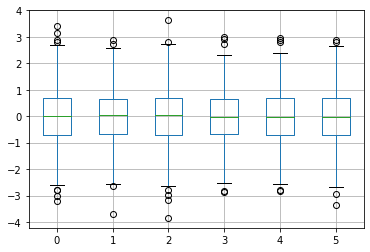

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_new[['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall']])
pd.DataFrame(scaler.transform(df_new[['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall']])).boxplot()

<AxesSubplot:>

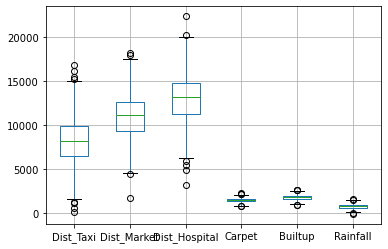

In [23]:
df_new.boxplot(column = ['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup', 'Rainfall'])

<div style="background-color:##EDF9FF">
 <ul><li><h3>Imputing missing values</h3></li></ul>
</div>

In [24]:
from sklearn.impute import SimpleImputer

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">There is an iterative imputer exist which models each feature with 
missing values as a function of other features, and uses that estimate for imputation.
For our exercise we will use simple imputer but learner should be aware of more sophisticated imputation techniques
Many strategies are avaiable to impute values.we are using most frequent to handle both numerical and categroical data in one line.
Learner can try different strategy for both types of variables (such as mean which is covered in the module)</span>
</div>

In [25]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  
df_imputer1 = pd.DataFrame(imp_mean.fit_transform(df.values))
df_imputer1.columns = df.columns
df_imputer1.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796,5250,10703,1659,1961,Open,CAT B,530,6649000
1,8294,8186,12694,1461,1752,Not Provided,CAT B,210,3982000
2,11001,14399,16991,1340,1609,Not Provided,CAT A,720,5401000
3,8301,11188,12289,1451,1748,Covered,CAT B,620,5373000
4,10510,12629,13921,1770,2111,Not Provided,CAT B,450,4662000


In [26]:
df_imputer1.isnull().sum()

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

In [27]:
df_imputed = df.fillna(df.mean()) ### Another technique to fill all missing value acoss all column with mean.

In [28]:
df_imputed.isnull().sum()

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

<div style="background-color:##EDF9FF">
 <ul><li><h3>OneHotEncoding</h3></li></ul>
</div>

In [29]:
df.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
category = df_imputed.select_dtypes(include=[object])
num =  df_imputed.select_dtypes(include=['float64','int64'])

In [32]:
encoded = category.apply(LabelEncoder().fit_transform)
onehot = pd.DataFrame(OneHotEncoder().fit_transform(encoded).toarray())
#print(type(onehot))
onehot.columns = ['Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'Parking_Open', 'City_Category_CAT A',
       'City_Category_CAT B', 'City_Category_CAT C']

In [33]:
onehot.head()

,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
df_onehotencoded = pd.concat([onehot.reset_index(drop=True), num], axis=1) ## Conctenating one-hot dataframe with other variable

In [35]:
df_onehotencoded.head()

,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9796.0,5250.0,10703.0,1659.0,1961.0,530.0,6649000.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8294.0,8186.0,12694.0,1461.0,1752.0,210.0,3982000.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11001.0,14399.0,16991.0,1340.0,1609.0,720.0,5401000.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8301.0,11188.0,12289.0,1451.0,1748.0,620.0,5373000.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10510.0,12629.0,13921.0,1770.0,2111.0,450.0,4662000.0


<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Alternative method in pandas</span>
</div>

In [36]:
getdummy = pd.get_dummies(df_imputed) #### Method available in Pandas

In [37]:
getdummy.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,City_Category_CAT A,City_Category_CAT B,City_Category_CAT C
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,1,0,1,0
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,0,1,0
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,0,1,0,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,0,1,0
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,0,1,0


<div style="background-color:##EDF9FF">
 <ul><li><h3>Feature Selection</h3></li></ul>
</div>

In [38]:
df.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449722,0.796846,0.011391,0.007170,0.020620,0.111612
Dist_Market,0.449722,1.000000,0.620130,-0.017377,-0.019288,0.069608,0.121574
Dist_Hospital,0.796846,0.620130,1.000000,0.011606,0.009124,0.050813,0.132047
Carpet,0.011391,-0.017377,0.011606,1.000000,0.998871,-0.046031,0.095636
Builtup,0.007170,-0.019288,0.009124,0.998871,1.000000,-0.042856,0.087600
Rainfall,0.020620,0.069608,0.050813,-0.046031,-0.042856,1.000000,0.007758
House_Price,0.111612,0.121574,0.132047,0.095636,0.087600,0.007758,1.000000


Carpet and builup area has very high degree of corelation.  All 3 distance are showing great degree of coorelation

<div style="background-color:##EDF9FF">
 <ul><li><h3>Creating LR model by including all the variables</h3></li></ul>
</div>

In [39]:
getdummy.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Rainfall', 'House_Price', 'Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'Parking_Open', 'City_Category_CAT A',
       'City_Category_CAT B', 'City_Category_CAT C'],
      dtype='object')

In [40]:
## Basis on degree of freedom, doing feature selection to remove 1 level in both the categorical data
df_dummy = getdummy.drop(['Parking_Open','City_Category_CAT C'], axis=1)
df_dummy.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Rainfall', 'House_Price', 'Parking_Covered', 'Parking_No Parking',
       'Parking_Not Provided', 'City_Category_CAT A', 'City_Category_CAT B'],
      dtype='object')

In [41]:
## Using dummytized dataset
x = df_dummy.drop('House_Price',axis=1)  ### Features
y = df_dummy.House_Price  ### Labels

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5) 

In [43]:
print(df_dummy.shape)
print(x_train.shape)
print(x_test.shape)

(929, 12)
(743, 11)
(186, 11)


In [44]:
x_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
347,9375.0,9562.0,12062.0,1222.0,1473.000000,630,0,0,1,1,0
869,5536.0,12153.0,11937.0,1304.0,1782.297268,530,0,0,0,0,0
840,3286.0,10258.0,10623.0,1447.0,1730.000000,510,1,0,0,0,0
247,10631.0,8780.0,15335.0,1184.0,1434.000000,670,0,0,1,0,0
153,9334.0,12267.0,14658.0,1442.0,1750.000000,130,0,0,1,0,1


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression().fit(x_train,y_train)

In [47]:
pred = model.predict(x_test)

In [48]:
model.score(x_test,y_test) ## Co-effecient of determination (R - Square)

0.3636298782810299

In [49]:
# Adjusted R square
1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.32339958322983064

<div style="background-color:##EDF9FF">
 <ul><li><h3>Validating the assumptions of Linear Regression</h3></li></ul>
</div>

Text(0, 0.5, 'residuals')

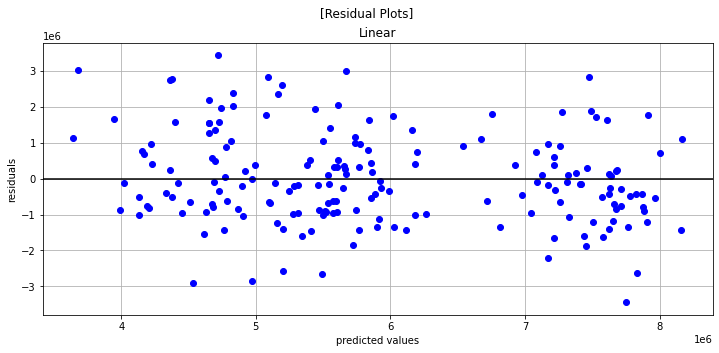

In [50]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Outlier is creating a problem and hence we should we first remove the outlier and the proceed with the model building</span>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

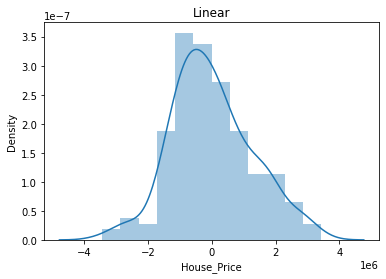

In [51]:
import seaborn as sns

residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

In [52]:
## Removing outlier
hp = sorted(df_dummy['House_Price'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = df_dummy['House_Price'] > lower_bound
above = df_dummy['House_Price'] < upper_bound
df_dummy = df_dummy[below & above]

In [53]:
x.shape

(929, 11)

In [54]:
x = df_dummy.drop('House_Price',axis=1)  ### Features
y = df_dummy.House_Price  ### Labels
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5) 

In [55]:
model = LinearRegression().fit(x_train,y_train)

In [56]:
print (model.score(x_test,y_test)) ## Co-effecient of determination (R - Square)
# Adjusted R square
print(1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.3636298782810299
0.32339958322983064


<AxesSubplot:title={'center':'Model Coefficients'}>

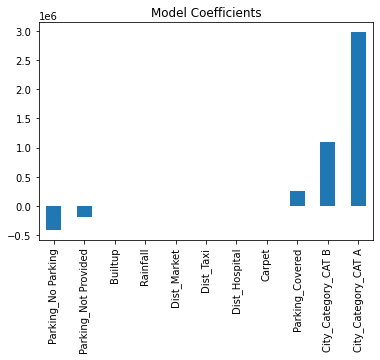

In [57]:
predictors = x_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

Text(0, 0.5, 'residuals')

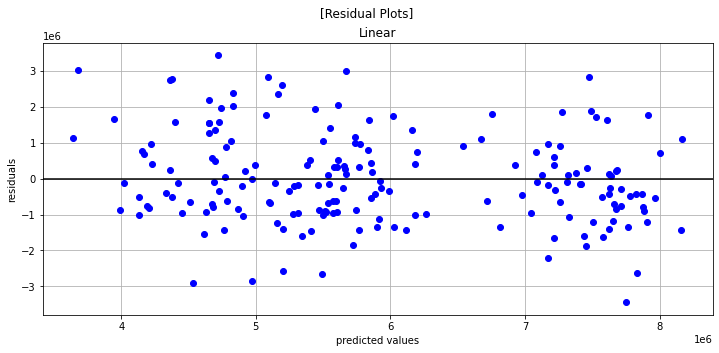

In [58]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

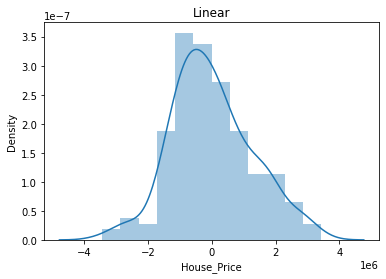

In [59]:
residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Moderate multicollinearity may not be problematic. However, severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable and difficult to interpret.We have seen previously that there is a hig degree of multilolinearlity is there in a model. Lets first remove them before fitting the model</span>
</div>

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [62]:
vif  ### Nan value of VIF higher than 10 creates a problem in my model.

,VIF,features
0,31.417810,Dist_Taxi
1,32.301488,Dist_Market
2,86.191156,Dist_Hospital
3,1355.878424,Carpet
4,1364.992406,Builtup
5,8.889832,Rainfall
6,1.515704,Parking_Covered
7,1.401130,Parking_No Parking
8,1.598036,Parking_Not Provided
9,2.331362,City_Category_CAT A


<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Basis the result of VIF, we should remove Carpet and Dist_hospital, Dist_market and check again the value of VIF</span>
</div>

In [63]:
x_new = x.drop(['Dist_Hospital','Builtup','Dist_Market'], axis=1)
x_new.shape

(929, 8)

In [64]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns
vif

,VIF,features
0,10.005220,Dist_Taxi
1,15.038030,Carpet
2,8.222223,Rainfall
3,1.509911,Parking_Covered
4,1.390633,Parking_No Parking
5,1.589533,Parking_Not Provided
6,2.289244,City_Category_CAT A
7,2.450118,City_Category_CAT B


In [65]:
## Using dummytized dataset
x_train, x_test, y_train, y_test = train_test_split(x_new,y,test_size = 0.20,random_state=5) 

In [66]:
model1 = LinearRegression().fit(x_train,y_train)

In [67]:
model1.score(x_test,y_test)

0.3803986450239947

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">The model looks fine even after removal of few high multicolinear variable</span>
</div>

<div style="background-color:##EDF9FF">
 <ul><li><h3>Regularization Techniques</h3></li></ul>
</div>

In [68]:
df_dummy.head() ## let us use the entire data set to build the model

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,Parking_Covered,Parking_No Parking,Parking_Not Provided,City_Category_CAT A,City_Category_CAT B
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,0,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,0,0,1,0,1
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,1,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,1
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,0,0,1,0,1


<div style="background-color:##EDF9FF">
 <ul><li><h3>Ridge Regression</h3></li></ul>
</div>

In [69]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [70]:
x = df_dummy.drop('House_Price',axis=1)  ### Features
y = df_dummy.House_Price  ### Labels
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5)

In [71]:
ridgeReg = Ridge(alpha=0.0005, normalize=True)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
score = ridgeReg.score(x_test,y_test)

C:\Users\Sarvagya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [72]:
score

0.3648542908220773

In [73]:
ridgeReg.coef_

array([ 3.02314414e+01,  1.94994651e+01,  5.17002174e+01,  2.51230648e+03,
       -1.47405608e+03, -1.97860584e+01,  2.62881567e+05, -4.10933459e+05,
       -1.81665241e+05,  2.97398805e+06,  1.08581054e+06])

<AxesSubplot:title={'center':'Model Coefficients'}>

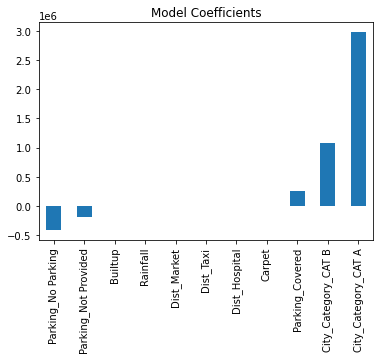

In [74]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

<div style="background-color:##FBFFE3">
   <div style="float:left">
       <img src='https://drive.google.com/uc?export=download&id=1No0HgbMyg7V7pVTF0A7LEIcruGkeH-BX', width=20,height=20,>
   </div>
   <span style="padding:20px;">Alpha is a hyperparameter in Ridge and can be used to control the penalty applied</span>
</div>

<div style="background-color:##EDF9FF">
 <ul><li><h3>Lasso Regression</h3></li></ul>
</div>

In [75]:
lassoReg = Lasso(alpha=0.03)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

C:\Users\Sarvagya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+14, tolerance: 2.240e+11
  model = cd_fast.enet_coordinate_descent(


0.3636299022208773

In [76]:
lassoReg.coef_

array([ 3.01006152e+01,  1.95536261e+01,  5.17624789e+01,  2.63510746e+03,
       -1.57682795e+03, -1.91327735e+01,  2.62684627e+05, -4.11059104e+05,
       -1.81758863e+05,  2.97640035e+06,  1.08765256e+06])

<AxesSubplot:title={'center':'Model Coefficients'}>

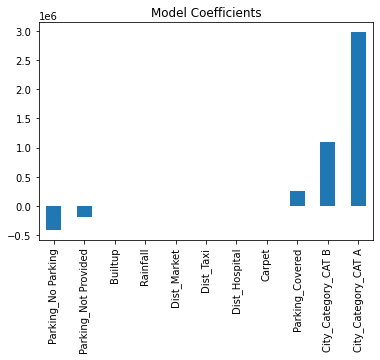

In [77]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

<b> conclusion </b> : we have cleaned the data using different pre-processing techniques and built a linear regression model by validating its assumptions 